### RSS RESULTS



### Logistics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Load data from the text file
log_data_file = 'logistics_results.txt'  # Replace with your file path
log_data = pd.read_csv(log_data_file, sep='\t')


In [3]:
# Load data from the text file
ac_data_file = 'area_cov_results.txt'  # Replace with your file path
ac_data = pd.read_csv(ac_data_file, sep='\t')

In [4]:
# Load data from the text file
tr_data_file = 'traffic_results.txt'  # Replace with your file path
tr_data = pd.read_csv(tr_data_file, sep='\t')

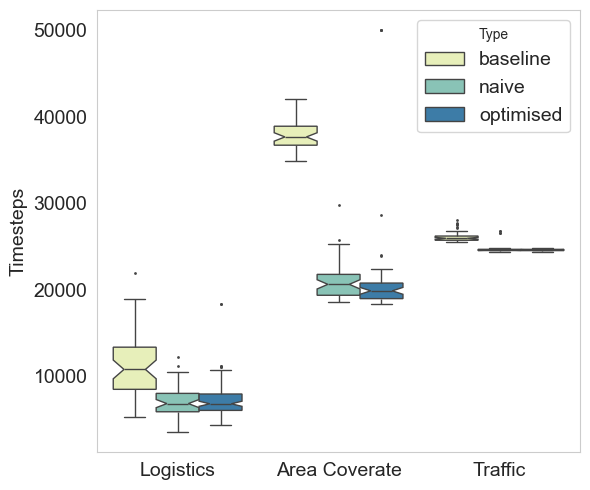

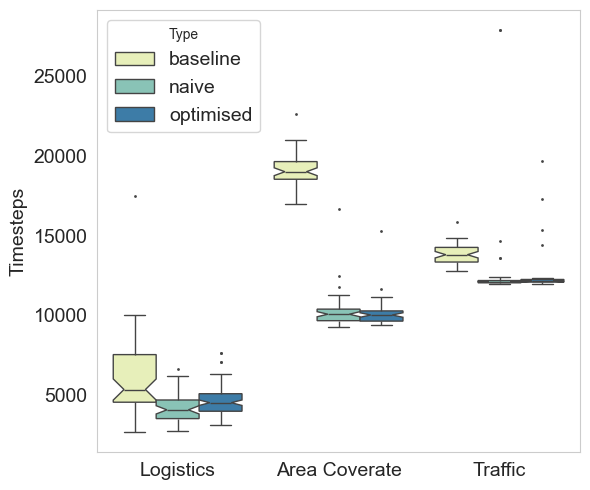

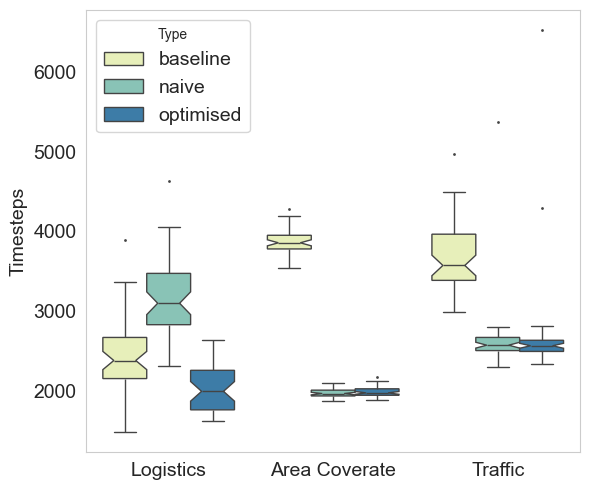

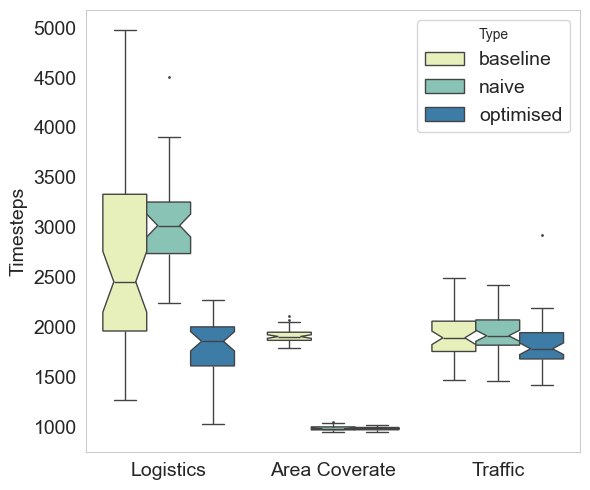

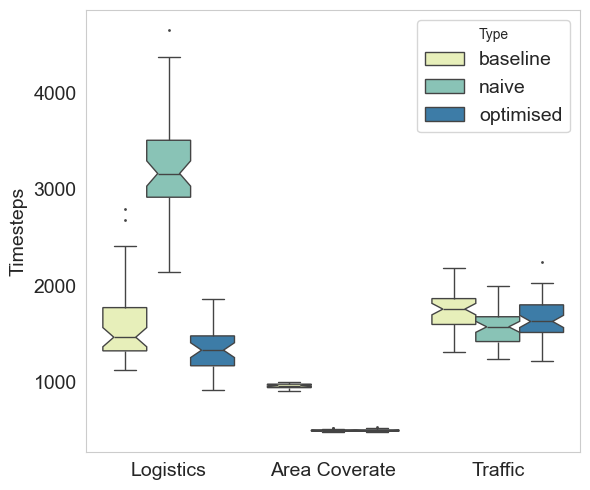

In [14]:
# Add a column to identify the experiment
log_data['experiment'] = 'Logistics'
ac_data['experiment'] = 'Area Coverate'
tr_data['experiment'] = 'Traffic'

# Combine all data
combined_data = pd.concat([log_data, ac_data, tr_data], ignore_index=True)

# Define box plot colors
box_colours = ['#edf8b1', '#7fcdbb', '#2c7fb8']

# Get unique num_rob values
unique_num_rob = combined_data['num_rob'].unique()
unique_num_rob.sort()

# Set up separate plots for each num_rob
for num_rob in unique_num_rob:
    subset = combined_data[combined_data['num_rob'] == num_rob]
    
    # Customize flier properties for small anomalous points
    flierprops = dict(marker='o', color='red', markersize=1)
    
    # Create the plot
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=subset,
        x='experiment',
        y='time',
        hue='type',  # Differentiate 'baseline', 'naive', 'optimised'
        palette=box_colours,
        width=0.8,
        notch=True, # Enable notched box plots
        flierprops=flierprops
    )
    
    # Remove gridlines
    plt.grid(False)
    
    # Add title and labels
    plt.xlabel('', fontsize=14)
    plt.ylabel('Timesteps', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(title='Type', fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()